In [66]:
import pandas as pd
import seaborn as sns

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from math import log, sqrt

In [57]:
df = pd.read_csv('depression_data.csv')
df.shape

(10314, 3)

In [58]:
df.head()

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

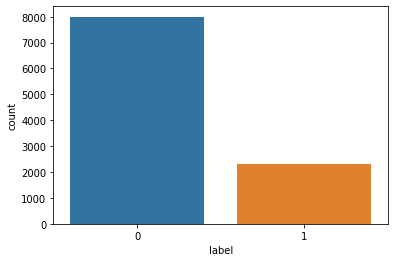

In [59]:
sns.countplot(df['label'])

In [60]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [61]:
df.label.value_counts(1)*100

0    77.564475
1    22.435525
Name: label, dtype: float64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10314 non-null  object
 1   label    10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


In [15]:
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
# ps = PorterStemmer()
wo = WordNetLemmatizer()
corpus=[]
for i in range(0,len(df)):
    message = re.sub('[^a-zA-Z]',' ',df['message'][i])
    message = message.lower()
    message = message.split()
    message = [wo.lemmatize(word) for word in message if word not in set(stopwords.words('english'))]
    message = ' '.join(message)
    corpus.append(message)

In [16]:
len(corpus)

10314

In [17]:
corpus

['real good moment miss much',
 'reading manga http plurk com p mzp e',
 'comeagainjen http twitpic com lx http www youtube com watch v zogfqvh',
 'lapcat need send em accountant tomorrow oddly even referring tax supporting evidence though',
 'add myspace myspace com lookthunder',
 'sleepy good time tonight though',
 'silkcharm nbn someone already said fiber home mean least regular',
 'c possible today nice',
 'nite twitterville workout ciao',
 'dananner night darlin sweet dream',
 'good morning everybody',
 'finally created wordpress blog already blog seattle coffee community http tinyurl com c uufd',
 'kisha cnt get u til get frm u remember ur top',
 'nicolerichie yes remember band awesome please reply',
 'really love reflection shadow',
 'blueaero ooo fantasy like fantasy novel check',
 'rokchic probs sell nothing blog http snedwan com get listen band itunes',
 'shipovalov quot nokla connecting people quot',
 'stayed late start early good thing like job',
 'kal penn read new job con

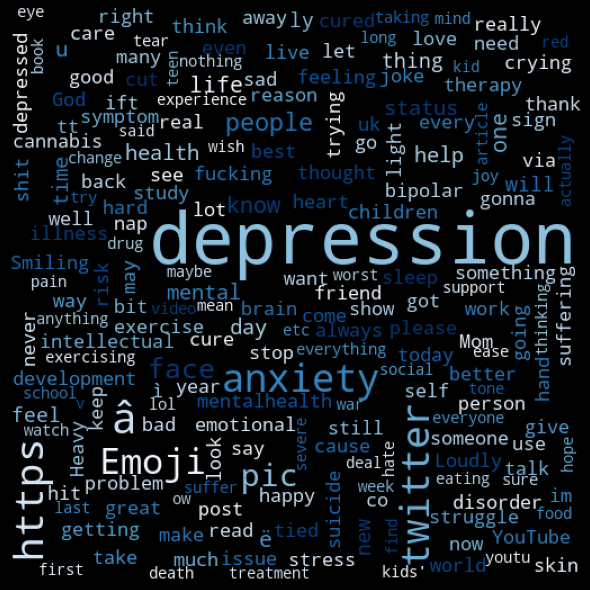

In [25]:
depressive_words = ' '.join(list(df[df['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

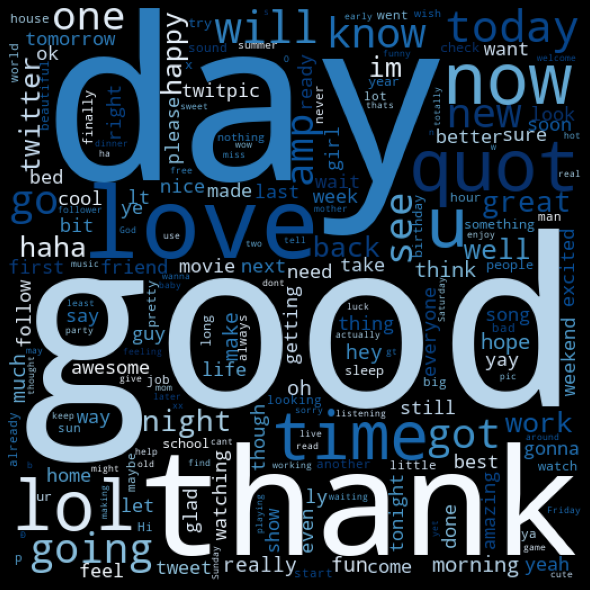

In [26]:
positive_words = ' '.join(list(df[df['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus,df['label'],test_size=0.25,random_state=42)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [30]:
X_train_vect.shape

(7735, 16566)

In [46]:
# from imblearn.over_sampling import SMOTE
# x_resample, y_resample = SMOTE().fit_sample(X_train_vect, y_train)
# x_test_resample, y_test_resample = SMOTE().fit_sample(X_test_vect, y_test)
# # lets print the shape of x and y after resampling it
# print(x_resample.shape)
# print(y_resample.shape)

In [32]:
from sklearn.metrics import classification_report,f1_score

In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train_vect, y_train)

LogisticRegression()

In [48]:
y_pred = clf.predict(X_test_vect)
print("f1 score is: ",f1_score(y_test,y_pred))
cr = classification_report(y_test, y_pred)
print(cr)

f1 score is:  0.9766187050359711
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2011
           1       1.00      0.96      0.98       568

    accuracy                           0.99      2579
   macro avg       0.99      0.98      0.99      2579
weighted avg       0.99      0.99      0.99      2579



In [51]:
import re
strr = "Hi hello depression and anxiety are the worst."
print("-------------------------------")
examples = strr

#preprocess
a = re.sub('[^a-zA-Z]',' ',examples)
a = a.lower()
a = a.split()
a = [wo.lemmatize(word) for word in a ]
a = ' '.join(a)  
print(a)
print("--------------------------------")

example_counts = vectorizer.transform([a])
prediction =clf.predict(example_counts)
prediction[0]

if prediction[0]==0:
    print('Positive')
elif prediction[0]==1:
    print('depressive')

-------------------------------
hi hello depression and anxiety are the worst
--------------------------------
depressive
